# Convolutional Neural Network

### Importing the libraries

In [26]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [27]:
tf.__version__

'2.14.0'

## Part 1 - Data Preprocessing

### Preprocessing the Training set

In [28]:
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True
)
training_set = train_datagen.flow_from_directory(
    "dataset/training_set", target_size=(64, 64), batch_size=32, class_mode="binary"
)

Found 8000 images belonging to 2 classes.


### Preprocessing the Test set

In [29]:
test_datagen = ImageDataGenerator(rescale=1.0 / 255)
test_set = test_datagen.flow_from_directory(
    "dataset/test_set", target_size=(64, 64), batch_size=32, class_mode="binary"
)

Found 2000 images belonging to 2 classes.


## Part 2 - Building the CNN

### Initialising the CNN

In [30]:
cnn = tf.keras.models.Sequential()

### Step 1 - Convolution

In [31]:
# unless it is not output activation should be relu
# input shape should be as in pre-processing step 64 x 64 x 3
# number of filters classically 32 but we may test other vals

cnn.add(
    tf.keras.layers.Conv2D(
        filters=32, kernel_size=3, activation="relu", input_shape=[64, 64, 3]
    )
)

### Step 2 - Pooling

In [32]:
# stride recommended 2x2
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Adding a second convolutional layer

In [33]:
# input shape only in first convolution layer
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation="relu"))

### Adding a second pooling

In [34]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Step 3 - Flattening

In [35]:
cnn.add(tf.keras.layers.Flatten())

### Step 4 - Full Connection

In [36]:
cnn.add(tf.keras.layers.Dense(units=128, activation="relu"))

### Step 5 - Output Layer

In [37]:
cnn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

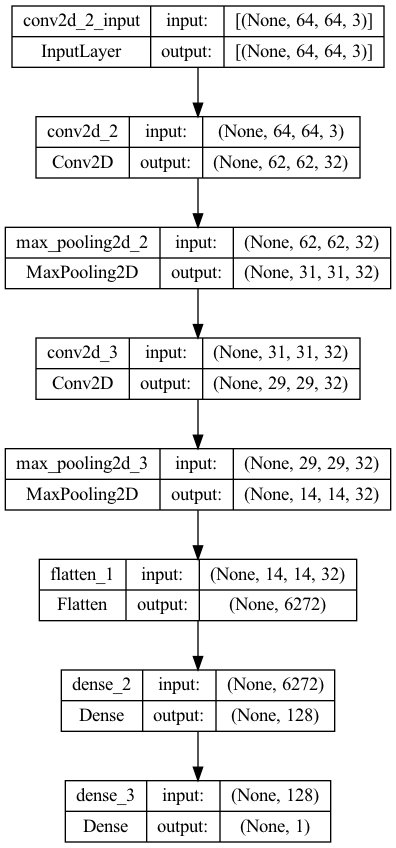

In [38]:
from tensorflow.keras.utils import plot_model

plot_model(cnn, to_file="cat_or_dog_cnn.png", show_shapes=True, show_layer_names=True)

## Part 3 - Training the CNN

### Compiling the CNN

In [39]:
cnn.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"],
)

### Training the CNN on the Training set and evaluating it on the Test set

In [40]:
cnn.fit(x=training_set, validation_data=test_set, epochs=25)

Epoch 1/25
250/250 [==============================] - 20s 78ms/step - loss: 0.6740 - accuracy: 0.5782 - val_loss: 0.6065 - val_accuracy: 0.6775
Epoch 2/25
250/250 [==============================] - 19s 77ms/step - loss: 0.6123 - accuracy: 0.6557 - val_loss: 0.5835 - val_accuracy: 0.7015
Epoch 3/25
250/250 [==============================] - 19s 78ms/step - loss: 0.5771 - accuracy: 0.7017 - val_loss: 0.5415 - val_accuracy: 0.7195
Epoch 4/25
250/250 [==============================] - 20s 79ms/step - loss: 0.5437 - accuracy: 0.7220 - val_loss: 0.5504 - val_accuracy: 0.7215
Epoch 5/25
250/250 [==============================] - 20s 78ms/step - loss: 0.5209 - accuracy: 0.7444 - val_loss: 0.5075 - val_accuracy: 0.7530
Epoch 6/25
250/250 [==============================] - 19s 77ms/step - loss: 0.4961 - accuracy: 0.7564 - val_loss: 0.4975 - val_accuracy: 0.7690
Epoch 7/25
250/250 [==============================] - 19s 76ms/step - loss: 0.4922 - accuracy: 0.7596 - val_loss: 0.5507 - val_accuracy:

## Part 4 - Making a single prediction

In [58]:
import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('dataset/test_set/cats/cat.4018.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'dog'
else:
  prediction = 'cat'

1/1 [==============================] - 0s 13ms/step


In [54]:
print(prediction)

cat


In [65]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 31, 31, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 6272)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [66]:
print(f"Values before expand_dims: Min={test_image.min()}, Max={test_image.max()}")

Values before expand_dims: Min=1.0, Max=255.0
